In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, roc_curve,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Heartdisease=pd.read_csv('https://storage.googleapis.com/dimensionless/Analytics/framingham.csv  ')

In [3]:
Heartdisease.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
Heartdisease.shape

(4240, 16)

In [50]:
Heartdisease.TenYearCHD.sum()

557

In [5]:
Heartdisease.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
#1. Load the data set. Look at the statistical summary of the dataset. How many observations are having null values?
#Ans:645
Total=Heartdisease.isna().sum()
Total.sum()

645

In [7]:
Heartdisease = Heartdisease.dropna(axis=0)

In [51]:
#2.How many columns are now in the new data frame?
#Ans:18
Heart = pd.get_dummies(Heartdisease,columns=['education'],drop_first=False)
Heart.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0


In [9]:
Heart.shape

(3658, 18)

In [10]:
y=Heart.TenYearCHD

In [11]:
X = Heart.copy()

In [12]:
del X['TenYearCHD']

In [13]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,0


In [14]:
X.shape,y.shape

((3658, 17), (3658,))

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=1000,stratify=y)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2377, 17), (1281, 17), (2377,), (1281,))

In [17]:
#3. Split the data set into training and testing sets with a ratio of 0.65 and perform stratified sampling
#on dependent variable. Use random_state of 1000. How many observations are present in the test dataset?
#Ans:1281

In [18]:
#4. What is the accuracy score for the baseline model?
#Ans:

In [19]:
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=1, strategy='uniform')

In [20]:
dummy.score(X_test,y_test)

0.5152224824355972

In [21]:
# 5. Build a Logistic Regression model using all the variables on the train dataset. What is the accuracy score for this model?
#Ans:0.8527

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train,y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
model.score(X_train,y_train)

0.8527555742532604

In [25]:
y_pred_train = model.predict(X_train)

In [26]:
confusion_matrix(y_train,y_pred_train)

array([[2004,   11],
       [ 339,   23]])

In [27]:
accuracy_score(y_train,y_pred_train)

0.8527555742532604

In [28]:
#6. Build a Logistic Regression model using the independent variables 'age', 'male', 'sysBP', 'glucose',
#'totChol', 'cigsPerDay' on the train dataset. What is the accuracy score for this model with a
#threshold value of 0.3?
#Ans:0.8296

In [29]:
model1 = LogisticRegression()

In [30]:
model1.fit(X_train[['age','male','sysBP','glucose','totChol','cigsPerDay']], y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
pred_train_prob = model1.predict_proba(X_train[['age','male','sysBP','glucose','totChol','cigsPerDay']])
pred_train_prob[:5]

array([[0.93517111, 0.06482889],
       [0.94036487, 0.05963513],
       [0.76569903, 0.23430097],
       [0.87582454, 0.12417546],
       [0.86740046, 0.13259954]])

In [32]:
pred_t_train = np.where(pred_train_prob[:,1]>=0.3,1,0)# taking thershold to 0.3
pred_t_train

array([0, 0, 0, ..., 0, 1, 1])

In [33]:
confusion_matrix(y_train,pred_t_train)

array([[1896,  119],
       [ 286,   76]])

In [34]:
accuracy_score(y_train,pred_t_train)

0.8296171644930584

In [35]:
pred_train_prob[:,0]

array([0.93517111, 0.94036487, 0.76569903, ..., 0.90178678, 0.64346643,
       0.59187329])

In [36]:
#7. Build a Logistic Regression model using the independent variables 'age', 'male', 'sysBP', 'glucose',
#'totChol', 'cigsPerDay' on the train dataset. Draw a ROC curve for this model. What is the area
#under curve for the model?
#Ans:0.7437

In [37]:
fpr,tpr,t = roc_curve(y_train,pred_train_prob[:,1],pos_label=1)

Text(0, 0.5, 'True Positive Rate (TPR)')

<Figure size 720x360 with 0 Axes>

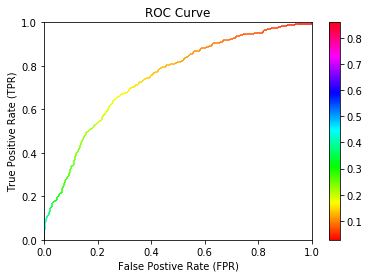

In [38]:
from matplotlib.collections import LineCollection
import matplotlib as npl
l1 = []
for i in range(len(fpr)-1):
    l1.append([(fpr[i],tpr[i]),(fpr[i+1],tpr[i+1])])
#print(l1)

lc = LineCollection(l1,cmap='hsv')
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
line=ax.add_collection(lc)
lc.set_array(t[1:])

plt.colorbar(line, ticks=np.arange(0,1,0.1))

plt.title('ROC Curve')
plt.xlabel('False Postive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

In [39]:
auc(fpr,tpr)

0.7437643091180786

In [40]:
#8. Build a Logistic Regression model using the independent variables 'age', 'male', 'sysBP', 'glucose',
#'totChol', 'cigsPerDay' on the train dataset. Use this model and perform predictions on test data.
#What is the accuracy score of the model on test data?
#Ans:0.8508

In [41]:
model2 = LogisticRegression()

In [42]:
model2.fit(X_train[['age','male','sysBP','glucose','totChol','cigsPerDay']], y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
model2.score(X_test[['age','male','sysBP','glucose','totChol','cigsPerDay']],y_test)

0.8508977361436377

In [44]:
pred_test=model2.predict(X_test[['age','male','sysBP','glucose','totChol','cigsPerDay']])

In [45]:
accuracy_score(y_test,pred_test)

0.8508977361436377

In [46]:
#9. Build a Logistic Regression model using the independent variables 'age', 'male', 'sysBP', 'glucose',
#'totChol', 'cigsPerDay' on the train dataset. Use this model and perform predictions on test data.
#What is the precision score of the model on test data?
#Ans:0.6428

In [47]:
confusion_matrix(y_test,pred_test)

array([[1081,    5],
       [ 186,    9]])

In [48]:
precision_score(y_test,pred_test)

0.6428571428571429

In [ ]:
#10.Build a Logistic Regression model using the independent variables 'age', 'male', 'sysBP', 'glucose',
#'totChol', 'cigsPerDay' on the train dataset. Use this model and perform predictions on test data.
#What is the specificity of the model on test data?
#Ans:0.9953

In [ ]:
specificity = (1081/(1081+5))
specificity